In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from keras.models import Sequential
from keras.layers import Dense

from sklearn.metrics import mean_squared_error as mse
from sklearn import metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [3]:
data = pd.read_csv('House_5_hour_heating_season.csv')

In [4]:
data = data.drop(data.loc[data['Date'] < '2019-09-30 00:00:00'].index)
df = data.drop(data.loc[data['Date'] > '2020-04-13 01:00:00'].index)

In [5]:
# Dropping Date Column as it does not contribute to the Model 

data.drop(['Date'], axis=1, inplace=True)

## Feature Selection

In [7]:
y = data.filter(['COP'])

In [8]:
x = data.copy()
x.drop(['COP'], axis=1, inplace=True)

In [10]:
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()

In [11]:
PredictorScalerFit=PredictorScaler.fit(x)
TargetVarScalerFit=TargetVarScaler.fit(y)

In [13]:
X=PredictorScalerFit.transform(x)
y=TargetVarScalerFit.transform(y)

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20)

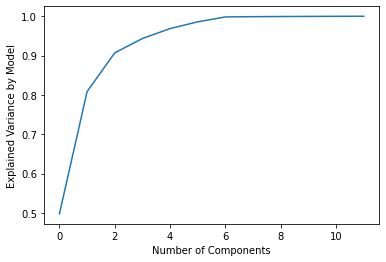

In [14]:
# Dimensionality Reduction

pca = PCA().fit(data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance by Model');

In [15]:
pca = PCA(n_components=6)
pca.fit(x)
x_pca = pca.transform(x)

print("Original shape:   ", x.shape) # 11 Features 
print("Transformed shape:", x_pca.shape) # 6 Feature

Original shape:    (3308, 11)
Transformed shape: (3308, 6)


## ANN Modelling 

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.20)

In [53]:
# create ANN model
model = Sequential()

In [54]:
# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=4, input_dim=6, kernel_initializer='normal', activation='relu'))

In [55]:
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=4, kernel_initializer='normal', activation='tanh'))

In [56]:
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))

In [57]:
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [58]:
# Fitting the ANN to the Training set
model.fit(x_train, y_train , batch_size = 20, epochs = 50, verbose=1)

Epoch 1/50
133/133 [==============================] - 11s 775us/step - loss: 0.9662
Epoch 2/50
133/133 [==============================] - 0s 760us/step - loss: 0.6797
Epoch 3/50
133/133 [==============================] - 0s 667us/step - loss: 0.5959
Epoch 4/50
133/133 [==============================] - 0s 960us/step - loss: 0.5409
Epoch 5/50
133/133 [==============================] - 0s 866us/step - loss: 0.5343
Epoch 6/50
133/133 [==============================] - 0s 754us/step - loss: 0.4773
Epoch 7/50
133/133 [==============================] - 0s 721us/step - loss: 0.4191
Epoch 8/50
133/133 [==============================] - 0s 782us/step - loss: 0.4084
Epoch 9/50
133/133 [==============================] - 0s 988us/step - loss: 0.3870
Epoch 10/50
133/133 [==============================] - 0s 1ms/step - loss: 0.3693
Epoch 11/50
133/133 [==============================] - 0s 810us/step - loss: 0.3975
Epoch 12/50
133/133 [==============================] - 0s 967us/step - loss: 0.3953
Ep

In [59]:
# Generating Predictions on testing data
Predictions=model.predict(x_test)
 
# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)
 
# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)
 
# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)
 
TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Price']=y_test_orig
TestingData['PredictedPrice']=Predictions
TestingData.head()

NameError: name 'Predictors' is not defined